<a href="https://colab.research.google.com/github/Manojkumar310897/Task-6/blob/main/Tak_6_Assignment8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment8

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/car_data.csv")

In [45]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [46]:
X=df[['Mileage']]
y=df['Price']

In [47]:
LR=linear_model.LinearRegression()
LR.fit(X,y)

LinearRegression()

**1.Finding linear regression equation**

In [48]:
print('intercept:', LR.intercept_)
print('coefficients:', LR.coef_)

intercept: 24764.559006061685
coefficients: [-0.1725205]


In [49]:
print('Linear Regression Equation: y = {:.4f} * x + {:.4f}'
      .format(LR.coef_[0], LR.intercept_))

Linear Regression Equation: y = -0.1725 * x + 24764.5590


Text(0.5, 1.0, 'Mileage vs Price')

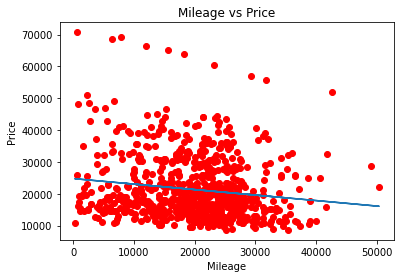

In [50]:
plt.scatter(X,y,color='r')
plt.plot(X,LR.predict(X))
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price')


In [51]:
print('r-squared:', LR.score(X, y))

r-squared: 0.02046344732348926


**Because this is below 0.8, this is not a good fit for this data **

# Task 2

In [52]:
feature = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
X = df[feature]
y = df[['Price']]
LR=linear_model.LinearRegression()
LR.fit(X,y)

LinearRegression()

In [53]:
df.corr()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
Price,1.000000,-0.143051,0.569086,0.558146,-0.138750,0.430851,-0.124348,0.157197
Mileage,-0.143051,1.000000,-0.029461,-0.018641,-0.016944,0.025037,-0.026146,0.001005
Cylinder,0.569086,-0.029461,1.000000,0.957897,0.002206,0.354285,-0.089704,0.075520
Liter,0.558146,-0.018641,0.957897,1.000000,-0.079259,0.377509,-0.065527,0.087332
Doors,-0.138750,-0.016944,0.002206,-0.079259,1.000000,-0.047674,-0.062530,-0.061969
Cruise,0.430851,0.025037,0.354285,0.377509,-0.047674,1.000000,-0.091730,-0.070573
Sound,-0.124348,-0.026146,-0.089704,-0.065527,-0.062530,-0.091730,1.000000,0.165444
Leather,0.157197,0.001005,0.075520,0.087332,-0.061969,-0.070573,0.165444,1.000000


In [54]:
print('intercept:', LR.intercept_)
print('coefficients:', LR.coef_)

intercept: [6758.7551436]
coefficients: [[-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
   6.28899715e+03 -1.99379528e+03  3.34936162e+03]]


In [55]:
def lin_reg_eq_print(feature, df):
    input_cols = df[feature]
    y = df['Price']
    regr_sd = linear_model.LinearRegression()
    regr_sd.fit(input_cols, y)
    print('The equation for columns {} with respect to Price:\n'
          '{} + {}'.format(feature, LR.coef_, LR.intercept_))

In [56]:
lin_reg_eq_print(feature, df)

The equation for columns ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'] with respect to Price:
[[-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
   6.28899715e+03 -1.99379528e+03  3.34936162e+03]] + [6758.7551436]


R2 SCORE

In [57]:
print('r-squared: ', LR.score(X, y))

r-squared:  0.4462643536728379


***Because this is below 0.8, this is not a good fit for this data ***

In [58]:
import itertools as it

In [59]:
def lin_r2(feature, df, p='Price'):
    input = df[feature]
    output = df[p]
    lr = linear_model.LinearRegression()
    lr.fit(input,output)
    return lr.score(input,output)

In [60]:
def get_combos(cols):
    return [it.combinations(cols, n + 1) for n in range(len(cols))]

In [61]:
combos = get_combos(feature)

In [62]:
def all_combo_scores(combos, df, focus='Price'):
    combo_scores = {}
    for m in range(len(list(combos))):
        for n in list(combos[m]):
            combo_scores[lin_r2(list(n), df, focus)] = n
    return combo_scores

In [63]:
combo_scores = all_combo_scores(combos, df)
sorted(combo_scores.items(), key=lambda c: c[0], reverse=True)

[(0.4462643536728379,
  ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.44569092105870245,
  ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.437805741536638,
  ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Leather')),
 (0.4369402151237246, ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Leather')),
 (0.43014148406475594,
  ('Mileage', 'Cylinder', 'Liter', 'Cruise', 'Sound', 'Leather')),
 (0.43001820483252684, ('Mileage', 'Cylinder', 'Cruise', 'Sound', 'Leather')),
 (0.4265348637809262,
  ('Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.4257681327974421, ('Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.42482840454267856,
  ('Mileage', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather')),
 (0.4244182401799875,
  ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound')),
 (0.42409748258510405, ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound')),
 (0.4225307670398465, ('Mileage', 'Cylinder', 'Liter', 'Cruise'

**There is no combination that produces a strong relation**

**Comparitively these are best possible feature combinations with highest R2 score**

(0.4462643536728379,
  ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'))

 (0.44569092105870245,
  ('Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather'))
  
  
 (0.437805741536638,
  ('Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Leather')),


# Task 3

In [64]:
df.columns

Index(['Price', 'Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder',
       'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'],
      dtype='object')

In [73]:
df_dummy = df.copy()

df_make = pd.get_dummies(df['Make'])
df_dummy[list(df_make.columns)] = df_make
df_dummy.pop('Make')


df_model = pd.get_dummies(df['Model'])
df_dummy[list(df_model.columns)] = df_model
df_dummy.pop('Model')

df_type = pd.get_dummies(df['Type'])
df_dummy[list(df_type.columns)] = df_type
df_dummy.pop('Type')

pd.set_option('display.max_columns', None)
df_dummy.head(10)

,Price,Mileage,Trim,Cylinder,Liter,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevrolet,Pontiac,SAAB,Saturn,9-2X AWD,9_3,9_3 HO,9_5,9_5 HO,AVEO,Bonneville,CST-V,CTS,Cavalier,Century,Classic,Cobalt,Corvette,Deville,G6,GTO,Grand Am,Grand Prix,Impala,Ion,L Series,Lacrosse,Lesabre,Malibu,Monte Carlo,Park Avenue,STS-V6,STS-V8,Sunfire,Vibe,XLR-V8,Convertible,Coupe,Hatchback,Sedan,Wagon
0,17314.103129,8221,Sedan 4D,6,3.1,4,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,17542.036083,9135,Sedan 4D,6,3.1,4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,16218.847862,13196,Sedan 4D,6,3.1,4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,16336.913140,16342,Sedan 4D,6,3.1,4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,16339.170324,19832,Sedan 4D,6,3.1,4,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,15709.052821,22236,Sedan 4D,6,3.1,4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,15230.003390,22576,Sedan 4D,6,3.1,4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,15048.042184,22964,Sedan 4D,6,3.1,4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,14862.093870,24021,Sedan 4D,6,3.1,4,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,15295.018267,27325,Sedan 4D,6,3.1,4,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [74]:
df_dummy.columns

Index(['Price', 'Mileage', 'Trim', 'Cylinder', 'Liter', 'Doors', 'Cruise',
       'Sound', 'Leather', 'Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB',
       'Saturn', '9-2X AWD', '9_3', '9_3 HO', '9_5', '9_5 HO', 'AVEO',
       'Bonneville', 'CST-V', 'CTS', 'Cavalier', 'Century', 'Classic',
       'Cobalt', 'Corvette', 'Deville', 'G6', 'GTO', 'Grand Am', 'Grand Prix',
       'Impala', 'Ion', 'L Series', 'Lacrosse', 'Lesabre', 'Malibu',
       'Monte Carlo', 'Park Avenue', 'STS-V6', 'STS-V8', 'Sunfire', 'Vibe',
       'XLR-V8', 'Convertible', 'Coupe', 'Hatchback', 'Sedan', 'Wagon'],
      dtype='object')

**Finding the best combination of factors to predict price.**

In [75]:
columns = list(df_make.columns)
columns.extend(df_model.columns)
columns.extend(df_type.columns)
input_cols = []
for item in columns:
    input_cols.append([item])
input_cols

[['Buick'],
 ['Cadillac'],
 ['Chevrolet'],
 ['Pontiac'],
 ['SAAB'],
 ['Saturn'],
 ['9-2X AWD'],
 ['9_3'],
 ['9_3 HO'],
 ['9_5'],
 ['9_5 HO'],
 ['AVEO'],
 ['Bonneville'],
 ['CST-V'],
 ['CTS'],
 ['Cavalier'],
 ['Century'],
 ['Classic'],
 ['Cobalt'],
 ['Corvette'],
 ['Deville'],
 ['G6'],
 ['GTO'],
 ['Grand Am'],
 ['Grand Prix'],
 ['Impala'],
 ['Ion'],
 ['L Series'],
 ['Lacrosse'],
 ['Lesabre'],
 ['Malibu'],
 ['Monte Carlo'],
 ['Park Avenue'],
 ['STS-V6'],
 ['STS-V8'],
 ['Sunfire'],
 ['Vibe'],
 ['XLR-V8'],
 ['Convertible'],
 ['Coupe'],
 ['Hatchback'],
 ['Sedan'],
 ['Wagon']]

In [76]:
features = ['Mileage','Cylinder','Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
combo_twos = list(it.combinations(features, 2))
combo_twos_list = [[x[0], x[1]] for x in combo_twos]
combo_twos_list

[['Mileage', 'Cylinder'],
 ['Mileage', 'Liter'],
 ['Mileage', 'Doors'],
 ['Mileage', 'Cruise'],
 ['Mileage', 'Sound'],
 ['Mileage', 'Leather'],
 ['Cylinder', 'Liter'],
 ['Cylinder', 'Doors'],
 ['Cylinder', 'Cruise'],
 ['Cylinder', 'Sound'],
 ['Cylinder', 'Leather'],
 ['Liter', 'Doors'],
 ['Liter', 'Cruise'],
 ['Liter', 'Sound'],
 ['Liter', 'Leather'],
 ['Doors', 'Cruise'],
 ['Doors', 'Sound'],
 ['Doors', 'Leather'],
 ['Cruise', 'Sound'],
 ['Cruise', 'Leather'],
 ['Sound', 'Leather']]

In [78]:
from copy import deepcopy
def all_combos_plus_scores(combos, combo_addition, df_dummy, focus='Price'):
    scores = {}
    for c_a in combo_addition:
        combos_c = deepcopy(combos)
        for cb in combos_c:
            cb.extend(c_a)
            scores[(cb[0], cb[1], cb[2])] = lin_r2(cb, df_dummy, focus)
    return scores

In [79]:
car_data_combos = all_combos_plus_scores(combo_twos_list, input_cols,df_dummy )
car_data_combos_list = sorted(car_data_combos.items(), key=lambda c: c[1], reverse=True)
max_dict = {}
for score_ in car_data_combos_list:
    try:
        max_dict[score_[0][2]]
    except:
        max_dict[score_[0][2]] = score_[1]
        print(score_[1], score_[0])



0.6952326188089184 ('Mileage', 'Cylinder', 'SAAB')
0.5827463723115367 ('Liter', 'Cruise', 'Cadillac')
0.5818864330871814 ('Cylinder', 'Cruise', 'Convertible')
0.5565646069943804 ('Cylinder', 'Doors', 'Coupe')
0.5183767328460664 ('Liter', 'Cruise', 'XLR-V8')
0.467700799707776 ('Cylinder', 'Cruise', '9_3 HO')
0.46131412749530276 ('Cylinder', 'Doors', 'Chevrolet')
0.4403137783141914 ('Cylinder', 'Cruise', '9_5')
0.42327964442945476 ('Cylinder', 'Cruise', 'Pontiac')
0.4209127935020318 ('Cylinder', 'Cruise', 'Wagon')
0.41425766320268764 ('Cylinder', 'Cruise', '9_3')
0.409490813455742 ('Cylinder', 'Cruise', '9_5 HO')
0.40853637029735634 ('Cylinder', 'Cruise', 'Sedan')
0.40801434993536756 ('Cylinder', 'Cruise', 'Buick')
0.4066332114627611 ('Cylinder', 'Cruise', 'CST-V')
0.4061981380211487 ('Cylinder', 'Cruise', 'Grand Prix')
0.4039216683852761 ('Cylinder', 'Cruise', 'Malibu')
0.4028424051921041 ('Cylinder', 'Cruise', 'STS-V6')
0.40241000428897733 ('Cylinder', 'Cruise', 'Bonneville')
0.4000437

**Above are the dominant two feature factors for each of the dummy variables; Cylinder and Cruise are the leading factors in the vast majority.**

**R2 SCORE of each dummy variable**

In [80]:
car_data_2 = {}
for item in deepcopy(input_cols):
    car_data_2[item[0]] = lin_r2(item, df_dummy)

score_list2 = sorted(car_data_2.items(), key=lambda c: c[1], reverse=True)
for score in score_list2:
    print(score[1], score[0])

0.43467222055774146 Cadillac
0.2580823726662361 Convertible
0.22329254532193288 XLR-V8
0.16369972777296582 Chevrolet
0.11249608486981633 SAAB
0.09268208373129971 AVEO
0.08811897712425065 Deville
0.08294059063514281 Corvette
0.07236606185907579 CST-V
0.060443061923161845 STS-V8
0.059386315780149745 Cavalier
0.04481729286980152 Saturn
0.044294927303921816 9_3 HO
0.042509414286992286 Hatchback
0.04218076819132699 Ion
0.03711188670126875 Cobalt
0.0331684123827396 STS-V6
0.02992939459223687 9_5
0.028253210000207085 Coupe
0.020191011838045725 Pontiac
0.01551727999156971 9_3
0.01441266225511073 Malibu
0.012235997496740647 9_5 HO
0.011848005294655573 Vibe
0.010715368384112356 CTS
0.00990383596925093 Sunfire
0.008683138908399224 Grand Am
0.007825848896145682 GTO
0.007741907120061953 Classic
0.004735027107433676 Grand Prix
0.003698911729677512 Century
0.0029638255654020895 L Series
0.0020370652981834825 Wagon
0.001866756188844798 Park Avenue
0.001211196934485459 Sedan
0.0008950546441520713 Monte

In [81]:
f = features + ['Cadillac', 'Convertible', 'XLR-V8']
lin_r2(f, df_dummy)

0.8205076058696161

**We are taking the best three R2 score dummy variables Cadillac, Convertible,XLR-V8 into account and find the model R2 score**

**These three factors are enough to consider the model as a good model.**

In [82]:
#If we take Cadillac, Convertible,Chevrolet as features then R2 will be
f = features + ['Cadillac', 'Convertible', 'Chevrolet']
lin_r2(f, df_dummy)

0.8301641680699673

In [83]:
f = ['Cadillac', 'Convertible', 'Chevrolet', 'Mileage', 'Cylinder', 'Cruise', 'Liter']
lin_r2(f,df_dummy)

0.8230830294947846

**So we can conclude that the three factors from Model,Make and Type needs to be considered along other numerical features to get the best model with a R2 score of 0.823**